## 02.최근접 이웃(KNN : K Nearest Neighborhood)

## (1) KNN 이해하기
옛말에 "유유상종"<span style="font-size:70%">[1]</span>이기 때문에 "그 사람을 알려면 그가 사귀는 친구를 보라"<span style="font-size:70%">[2]</span> 라는 말이 있다. 서로 비슷한 사람들이 끼리끼리 어울려 다니며 사귀는법이기 때문에 어울리는 무리를 통해 그 사람에 대해서 판단해볼만 하다는 이야기이다. 이는 KNN알고리즘의 작동 방식과 정확하게 일치한다. 

KNN은 어떤 미지의 데이터에 대하여 가장 근접한 데이터의 라벨을 그 데이터의 정체로 판단하는 지도학습 분류(Classification) 알고리즘을 말한다. 

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_01.png?raw=true" width=600>
    <p>[그림201]</p>
    
</div>

## (2) KNN의 작동원리

KNN은 어떤 미지의 라벨을 분류하는 **지도학습** 방식의 알고리즘이기 때문에, 분류하고자 하는 정답값이 존재하는 라벨링이 된 데이터를 모델학습에 활용한다.

KNN은 학습시 별도의 복잡한 과정 없이 훈련데이터 모두를 N차원상의 벡터공간의 한 점(벡터)으로 메모리에 저장하고 학습을 마무리한다. 아래 그림처럼 총 10개의 관측값이 존재하는 라벨링된 데이터를 학습할 경우 10개의 점을 N차원상의 한 점으로 맵핑할 뿐이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_02.png?raw=true" width=700>
	<p>[그림202]</p>
</div>

그리고 분류할 데이터도 마찬가지로 훈련데이터와 같은 벡터공간의 벡터로 맵핑하고, 사전에 맵핑시킨 모든 벡터와 거리를 비교한다.

그 후 가장 가까운 K개만큼의 벡터를 추출해 그 중 다수결 원칙에 따라 분류를 진행한다.

<div align="center">
    <p align="center">[그림203]</p>
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_03.png?raw=true" width=400>
	
</div>

그렇기 때문에 K의 수에 따라 모델이 분류하는 결과값이 달라질 수 있으며, 보통은 K값의 동률을 방지하기 위해 홀수로 설정하며, 만약 동률이 발생할 경우 무작위 혹은 각 점의 거리가 짧은 순으로 판단한다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_04.png?raw=true" width=600>
	<p>[그림204]</p>
</div>

## (3)KNN 알고리즘 더 깊게 이해하기

### KNN 알고리즘의  특징
KNN은 단순히 데이터를 N차원상의 벡터공간의 한 점으로 저장하고, 비교하여 예측값을 제공할 뿐이기 때문에 [01.머신러닝의 이해](https://github.com/int29/PMLP-101/blob/main/chapter_01_Understanding_Machine_Learning/01.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.md) 에서 머신러닝의 학습에 대해 설명했던 추상화와 일반화 과정이 없는 모형이다. 이렇게 모델을 만들지 않고 단순히 각 데이터를(인스턴스) 저장하였다 활용하는 알고리즘을 인스턴스 베이스 머신러닝 알고리즘이라고 하고, KNN은 인스턴스 베이스 모델중 한가지 이다.<span style="font-size:70%">1</span>,<span style="font-size:70%">2</span> 

KNN은 학습과정에서 추상화를 통해 데이터의 패턴을 계산하고 미지의 데이터에 대해서도 잘 반영할 수 있는 모델을 만드는 일반화 과정 없이 단순히 벡터공간상의 한 점으로 맵핑하여 학습을 진행하기 때문에 모델 베이스 머신러닝에 비해서 훈련속도가 빠르다. 

또한 간단한 알고리즘이기 때문에 하이퍼 파라미터가 적어 개발 및 파라미터 튜닝과정 또한 상대적으로 빨리 모델을 개발할 수 있다. 

마지막으로 로직이 직관적이기 때문에 가장 처음 생성하고 살펴보는 베이스모형(혹은 벤치마크모형)에 많이 사용하곤한다.

반면 분류하려는 값에 대하여 모든 훈련 인스턴스와 비교를 진행하기 때문에 훈련속도는 빠르지만 예측(분류)하는 속도는 모델 베이스 모형보다 느리다. 또 두 벡터 사이의 거리를 계산하는 방식으로 이상치나 잡음, 데이터 피처(Feature)의 스케일에 영향을 많이 받는다는 단점이 존재한다. 또한 적절 K를 선정하는것이 어렵다. 

### KNN의 거리계산 방식
KNN은 거리가 가까울수록 유사도가 높고, 거리가 멀수록 유사도가 낮다는 굉장히 심플한 논리를 갖고 있다. 따라서 KNN은 벡터(좌표평면의 한 점)끼리의 거리를 계산하여 얼마나 유사한지 유사도를 계산한다. 거리 계산 시 가장 많이 사용하는 방법은 유클리디안 거리(Euclidean distance) 계산 방식으로 중학교 수학에 나오는 피타고라스의 정리와 계산방법이 동일한 거리계산 법이다. 

> 유클리디안 거리(Euclidean distance)는 유클리드가 선형대수에서는 L2 norm이라고 부르는 벡터간 최단거리를 계산하는 방법이다. 세분화된 분야에 따라서 부르는 명칭은 다르지만 계산하는 방식은 모두 동일하다.

유클리디안 거리(Euclidean distance) 는 아래와 같이 계산한다.

$$d(p,q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2} =  \sqrt{(x_1 - x_2)^2+(y_1 - y_2)^2+...+(u_1 - u_2)^2} $$
$d(p,q)$는 두 점 $p$와 $q$ 사이의 거리를 나타내고, $n$은 차원의 수를 나타냄. $u$는 N번째 차원의 축을 의미함

예를 들어 x축과 y축 2개의 축을 갖는 2차원상의 두 점(벡터) $p$와 $q$는 각각 $(x_1, y_1)$, $(x_1, y_2) = (1, 2), (3, 4)$ 이라는 좌표를 갖는다고 해보자.  두 점 $p$와 $q$는 아래와 같이 좌표계에 표현이 가능할 것이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_05.png?raw=true" width=400>
	<p>[그림205]</p>
</div>

이 때 두 점사이의 최단거리는 두점의 직선거리가 되기 때문에 

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_06.png?raw=true" width=400>
	<p>[그림206]</p>
</div>

유클리디안 거리 계산 공식에 대입하면 두 점사이의 거리가 $2$ 임을 계산할 수 있다.
$$d(p,q) =\sqrt{(1 - 3)^2+(2 - 4)^2}= \sqrt{(-2)^2+(-2)^2} = \sqrt{4} = 2$$

이를 쉽게 생각하면 아래와 같은 삼각형의 대각선의 거리와 동일한 모양이 나온다. 따라서 피타고라스의 정리를 적용하면 동일한 결과가 나오는것을 알 수 있다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_07.png?raw=true" width=400>
	<p>[그림207]</p>
</div>

> 거리를 계산하는 방법이나, 유사도를 계산하는 방법은 맨하튼 거리(L1 norm), 코사인유사도($\theta$)(cosin distance), 두 점사이의 상관관계를 활용하는 마할라노비스 거리(Mahalanobis distance) 등 여러 방법이 존재한다. 각 방법의 장단이 존재하고 사용해야하는 상황이 각기 다르기 때문에 추후에 꼭 각 거리의 계산법과 장단점들을 공부하길 바란다.<span style="font-size:70%">[3]</span> 

## (4) KNN데이터 활용해보기

Iris 데이터는 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 총 4개의 피처(features)로 구성돼 있다. 이번 챕터는 위에서 설명한 KNN모형에 대해서 활용과 함께 이해하는 것이 목표이기 때문에 우선 'petal length (cm)', 'petal width (cm)' 2개의 피처로 KNN모형을 만들어 실제 KNN알고리즘이 어떻게 작동하는지 확인하고 4개의 모든 피처로 iris의 class를 분류(예측)하는 완성된 KNN모형을 만들것이다.


사용하는 Iris 데이터의 설명과 전처리 및 EDA에 대한내용은 분량 및 구성상 [예제 데이터 설명 : iris 데이터]() 에 설명해 두었으니, 본 예제를 진행하기 전 꼭 확인후에 알고리즘 활용을 살펴보길 바란다. 

### Step00 : 라이브러리 로드
pure python을 통해서 A부터 Z까지 개발하는건 아니기 때문에 데이터를 핸들링하는 pandas, numpy 라이브러리, 시각화를 도와주는 matplotlib, seaborn, KNN모델을 만들 수 있는 sklearn라이브러리를 로드한다.

사용하는 라이브러리는 아래와 같고 설치가 필요할 경우 아래 명령어를 통해 설치하도록 하자.
1. 데이터 전처리를 위한 pandas 및 numpy 라이브러리, 데이터 시각화를 위한 라이브러리 matploblib, seaborn
    * `pip install pandas, numpy, matploblib, seaborn` <br><br>
2. sklearn 머신러닝 라이브러리
    * `pip install scikit-learn`

In [55]:
# 데이터 전처리를 위한 pandas 및 numpy 라이브러리 로드
import pandas as pd
import numpy as np

# sklearn 머신러닝 라이브러리에서 iris 예제 데이터 로드하는 함수 로드
from sklearn.datasets import load_iris

# sklearn KNN 로드
from sklearn import neighbors

# sklearn Train&Test Set나누는 함수 로드
from sklearn.model_selection import train_test_split

# Sklearn 평가(metric)함수 중 accuracy 점수 로드
from sklearn.metrics import accuracy_score

# warnning message를 노출하지 않는 설정
import warnings
warnings.filterwarnings(action='ignore')

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 주피터 노트북에 차트를 바로 랜더링하기 위한 주피터노트북 내장 매직명령어
%matplotlib inline 

### Step01 : 데이터 로드 및 클린징(전처리)

라이브러리를 로드하였다면, Iris데이터를 로드하고 데이터프레임형태로 전처리한다.

In [56]:
# iris 데이터로드 및 처리
iris_data = load_iris()

# iris 피처데이터 값, 피처 칼럼명, 타겟 데이터값, 타겟값의 각 class의 이름 로드
# 해당 과정에 대한 자세한 설명은 [예제 데이터 설명 : iris 데이터]를 참고

features = iris_data['data'] # iris데이터에서 피쳐들의 값을 추출
column_name = iris_data['feature_names'] # iris데이터에서 피쳐칼럼명을 추출

target = iris_data['target'] # iris데이터에서 타겟 칼럼값을 추출
target_name = iris_data['target_names'] #타겟값의 각 class의 이름 로드

# python dictionry 형태의 iris데이터를 pandas데이터프레임으로 변환
iris_df = pd.DataFrame(features, columns= column_name)

# 추출한 타겟값을 target이라는 칼럼명으로 추가
iris_df['target'] = target

# 0,1,2 코드형태로 저장된 타켓값을 알맞게 'setosa', 'versicolor', 'virginica'에 맞는 신규칼럼생성
iris_df['target_names'] = ''
iris_df['target_names'][iris_df['target']==0] = iris_data['target_names'][0]
iris_df['target_names'][iris_df['target']==1] = iris_data['target_names'][1]
iris_df['target_names'][iris_df['target']==2] = iris_data['target_names'][2]

In [57]:
# 데이터 head 체크
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [58]:
# 데이터 head 체크
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


### Step02 : 모델 훈련을 위한 데이터 준비
### KNN의 직관적 이해를 위한 샘플데이터 추출

In [59]:
# 5개의 샘플을 랜덤으로 추출하여 sampled_train에 저장
# 참고 : random_state는 시스템이 랜덤으로 뽑는 seed를 고정해서 여러번 수행해도 같은 결과가 노출될 수 있도록 고정한다.
#987654
sampled_train = iris_df.loc[(iris_df.target_names == "setosa")|(iris_df.target_names == "virginica")].sample(6, random_state=987654)
sampled_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
41,4.5,2.3,1.3,0.3,0,setosa
112,6.8,3.0,5.5,2.1,2,virginica
35,5.0,3.2,1.2,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
14,5.8,4.0,1.2,0.2,0,setosa
135,7.7,3.0,6.1,2.3,2,virginica


In [60]:
# 1개의 샘플을 랜덤으로 추출하여 sampled_test에 저장
# 98765
sampled_test = iris_df.loc[(iris_df.target_names == "setosa")|(iris_df.target_names == "virginica")].sample(1,random_state=123457)
sampled_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
116,6.5,3.0,5.5,1.8,2,virginica


In [61]:
# 데이터를 피쳐 + 타겟으로 분리
# 이번 예제에서 피처는 'petal length (cm)', 'petal width (cm)' 2개를 사용할 예정이다.

# 'petal length (cm)', 'petal width (cm)'만 선택하여 훈련데이터 생성
X_train = sampled_train[['sepal length (cm)', 'sepal width (cm)']]
y_train = sampled_train['target_names']

# 'petal length (cm)', 'petal width (cm)'만 선택하여 테스트이터 생성
X_test = sampled_test[['sepal length (cm)', 'sepal width (cm)']]
y_test = sampled_test['target_names']

### 훈련+테스트 데이터 시각화

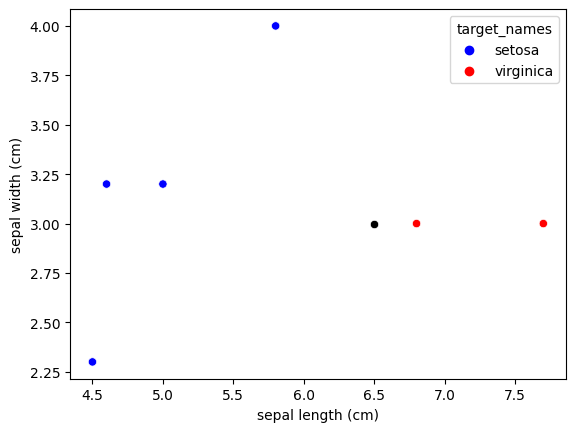

In [62]:
# 훈련데이터
sns.scatterplot(data=sampled_train, x="sepal length (cm)", y="sepal width (cm)", hue="target_names", palette=['blue','red'])

# 테스트데이터
sns.scatterplot(data=sampled_test, x="sepal length (cm)", y="sepal width (cm)", hue="target_names", palette=['black'], legend=False)
plt.show()

### Step03 : 모델 훈련 및 예측결과
만들어낸 샘플 데이터를 통해 KNN 모델을 생성하고 예측한 결과는 아래와 같다.

In [63]:
# estimater 생성 (모델 생성, k=1~5까지)
clf = neighbors.KNeighborsClassifier(n_neighbors=n, metric="euclidean")

# 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
clf.fit(X_train, y_train)

# 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
pred = clf.predict(X_test)
print(f"K={n}일 때, 테스트데이터에 대한 KNN의 예측결과는 {pred} 입니다.")

K=1일 때, 테스트데이터에 대한 KNN의 예측결과는 ['virginica'] 입니다.


### K값에 따라 달라지는 결과

In [64]:
# estimater 생성 (모델 생성, k=1~5까지)
for n in range(1,6):
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=n, metric="euclidean")

    # 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
    clf.fit(X_train, y_train)

    # 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
    pred = clf.predict(X_test)
    print(f"K={n}일 때, 테스트데이터에 대한 KNN의 예측결과는 {pred} 입니다.")

K=1일 때, 테스트데이터에 대한 KNN의 예측결과는 ['virginica'] 입니다.
K=2일 때, 테스트데이터에 대한 KNN의 예측결과는 ['virginica'] 입니다.
K=3일 때, 테스트데이터에 대한 KNN의 예측결과는 ['virginica'] 입니다.
K=4일 때, 테스트데이터에 대한 KNN의 예측결과는 ['setosa'] 입니다.
K=5일 때, 테스트데이터에 대한 KNN의 예측결과는 ['setosa'] 입니다.


위 결과에 대해서 직관적으로 해석해보면 다음과 같은데, K의 값에 따른 KNN모델의 훈련을 시각화 하면 아래와 같을 것이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/img/02_17.png?raw=true">
	<p>[그림207]</p>
</div>

여기서 K=4인 경우 `setosa`, `virginica` 인스턴스가 각각 2개로 동률(tie)인데, Sklearn은 동률일 경우 target 라벨의 소팅 순서대로 결과를 내보내기 때문에 `setosa`로 예측한다.)

>원문 : Warning Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.[\[4\]](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### KNN 하이퍼파라미터와 하이퍼파라미터 튜닝&최적화

머신러닝에는 사용자가 정해줘야하는 값인 하이퍼 파라미터라는 값이 존재한다. 이 하이퍼 파라미터를 어떻게 결정하느냐에 따라 좋은결과를 얻을 수도, 과적합이나 과소적합된 모형을 만들 수 있기 때문에 모델의 훈련정확도를 올리고 테스트데이터에 대한 일반화 정도를 높이기 위해 하이퍼 파라미터 튜닝하는 과정이 필수적으로 요구된다. 
sklearn 라이브러리의 neighbors.KNeighborsClassifier( ) 는 아래와 같이 사용자가 정해주어야할 하이퍼파라미터가 존재한다. 

    KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

전체 하이퍼파라미터 및 함수인자는 [공식문서]("https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html") 에서 확인 가능하다. 여기서는 neighbors.KNeighborsClassifier의 주요한 하이퍼파라미터가 의미하는 바와 어떻게 영향을 미치는지 확인해보자.

### 1) n_neighbors=5 : K의 수 (기본값 5)
n_neighbors의 경우 위 예시에서 확인했듯, K의 수이다. K개만큼 이웃을 추출하여 타겟값을 예측한다. (단, K개는 전체 훈련 인스턴스의 수 이상으로 설정할 수 없다.)

여기서 중요한 부분은 K의 증가와 감소에 따른 모델이 어떻게 변화하는지인데, K가 작을경우 소수의 훈련인스턴스에 따라서 모델의 결과가 정해지기 때문에 모델은 과적합(Overfitting)될 가능성이 높다. 반대로 K가 증가할수록 점점 불필요한 이웃들이 포함될 가능성이 높아져 과소적합(Underfitting) 가능성이 올라간다. 위 예시에서 k가 5이상부터는 전체 훈련 데이터에 virginica가 2개밖에 되지 않기 때문에 무조건 setosa가 과반을 차지한다. 따라서 KNN모델은 setosa만 노출하게 돼 모델은 훈련데이터와 테스트데이터 모두를 반영하지 못하는 과소적합(Underfitting)상태가 된다.

또한 동률일 경우 단지 setosa의 순서가 virinica보다 앞서 정렬되기 때문에 setosa가 노출되게 된다. 이처럼 짝수일 경우 동률(tie)문제가 발생할 수 있기 때문에 보통은 홀수로 설정한다.

### 2) metric='minkowski' : 인스턴스간 거리 측정방식 (기본값 : minkowski)

metric은 인스턴스간 거리를 어떻게 계산할지 설정하는 하이퍼 파라미터이다. 거리를 계산하는 방법이나, 유사도를 계산하는 방법은 맨하튼 거리(L1 norm), 코사인유사도(𝜃)(cosin distance), 두 점사이의 상관관계를 활용하는 마할라노비스 거리(Mahalanobis distance) 등 여러 방법이 존재한다. 각 방법의 장단이 존재하고 사용해야하는 상황이 각기 다르기 때문에 추후에 꼭 각 거리의 계산법과 장단점들을 공부가 필요하며[3] Sklearn의 KNN모델에서 지원하는 거리계산 방식은 [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics) 에서 참고가 가능하다. 

특별한 경우가 아닌 매우 일반적인 상황에서는 `euclidean`을 주로 활용한다.

### 3) weights='uniform' : 인스턴스의 중요도를 다르게 평가하기 (기본값='uniform')

위 예시에서 K=4인 경우 동률이기 때문에 단지 ordering 으로 예측결과를 산출했다. KNN은 산술적으로 K개만큼 이웃 인스턴스를 추출하기 때문에 이러한 결과를 내보내는 것이다. 하지만 직관적으로 산점도를 살펴보면 검정색 테스트데이터는 붉은색 `virginica` 그룹에 더 가깝게 위치해있기 때문에 `virginica`로 판단하는게 더 합리적이게 보이는데 이렇게 각 인스턴스에 다른 가중치를 주는 하이퍼파라미터가 `weights` 이다. 기본값인 `uniform`은 모든 인스턴스를 동일하게 생각하겠다는 것이고, `distance`를 설정해 거리가 가까운 인스턴스를 더 중요하게 판단하게 모델훈련이 가능하다.(또는 사용자가 직접 명시한 가중치를 통해 각 인스턴스의 중요도를 설정가능하다)

아래 `K=4`인 KNN모델에 `weights="distance"`를 설정할경우 기존과 어떻게 달라지는지 확인해보자.

In [48]:
clf = neighbors.KNeighborsClassifier(n_neighbors=4, metric="euclidean", weights="distance")

# 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
clf.fit(X_train, y_train)

# 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
pred = clf.predict(X_test)
print(f"K=4일 때, 테스트데이터에 대한 KNN의 예측결과는 {pred} 입니다.")

K=4일 때, 테스트데이터에 대한 KNN의 예측결과는 ['virginica'] 입니다.


`weights="distance"`로 하이퍼파라미터를 설정한 결과 `setosa`로 예측했던 과거와 달리 `virginica`로 올바르게 예측하는것을 확인할 수 있다. 이처럼 단지 모델개발을 한번하는것 외에도 머신러닝 모델을 개발할 때는 우리의 목표에 맞는 모델이 개발될 수 있도록 하이퍼파라미터를 튜닝하여 최적화하는 과정이 필수이다.

## (5) KNN 모델 예제 : 붖꽃(Iris) 품종 분류모델 개발

Iris 데이터의 샘플을 통해 KNN에 대한 모델을 이해했다면, 이제는 전체 Iris데이터를 통해서 KNN 모델을 개발해보자 위 `Step00 : 라이브러리 로드`, `Step01 : 데이터 로드 및 클린징(전처리)`된 데이터를 계속 사용한다.

### Step02 : 모델 훈련을 위한 데이터 준비

In [69]:
# 데이터를 피쳐 + 타겟으로 분리
# 이번 예제에서 피처는 'petal length (cm)', 'petal width (cm)' 2개를 사용할 예정이다.

# 'petal length (cm)', 'petal width (cm)'만 선택하여 훈련데이터 생성
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]

# 타겟
y = iris_df['target_names']

# 모델을 학습할 데이터인 150송이 중 80%와 테스트할 20%를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Step03 : 베이스 모델훈련

In [70]:
# estimater 생성 (모델 생성, k=1)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

# 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Step04 : 예측 및 평가

In [71]:
# 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
pred = clf.predict(X_test)

# 예측값 확인
pred

array(['virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [72]:
# 실제 값과 평가
accuracy_score(pred, y_test)*100

66.66666666666666

### Step05 : 하이퍼 파라미터 튜닝

하이퍼 파라미터는 사용자가 직접 설정하는 값이기 때문에 "어떤 값을 넣는것이 옳은가?" 라는 의문이 들 수 있다. 하지만 애석하게도 `00.들어가기`에 설명했듯이 이건 The Art의 영역이기 때문에 정답이 없다. 내가 갖은 데이터, 머신러닝 Task에 따라 하이퍼파라미터값에 따른 모델의 점수를 살펴보며 하이퍼파라미터를 튜닝하게된다. 가장 쉬운 방법은 범위를 지정하고 그 범위에 맞는 모든 조합을 실행한 후 가장 점수가 좋은 하이퍼 파라미터를 사용하는 것이다.

> 하이퍼 파라미터를 튜닝하고 최적화하는 과정을 최적화 이론에 따라서 튜팅이 가능하다. 한가지 예시로 모든 값을 실행해보는 grid search 방법외에 베이지안 최적화를 통해서 하이퍼파라미터를 튜닝할 수 있다.
> * 베이지안 최적화 : bayes_opt 파이썬 라이브러리(https://github.com/fmfn/BayesianOptimization)

In [73]:
# estimater 생성 (모델 생성, k=1)
hyper_param_n_neighbors = [1,3,5,7,9]
hyper_param_metric = ["euclidean","minkowski"]
hyper_param_weights = ["distance","uniform"]

for k in hyper_param_n_neighbors:
    for param_metric in hyper_param_metric:
        for param_weights in hyper_param_weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors=k, metric=param_metric, weights=param_weights) # 하이퍼 파라미터를 적용한 estimator 생성
            clf.fit(X_train, y_train) # 모델 훈련
            pred = clf.predict(X_test) # 예측
            pred_score = accuracy_score(pred, y_test)*100 # 실제 값과 평가
            
            print(f"K={k}, metric={param_metric}, weights={param_weights} 일 때, 테스트데이터에 대한 KNN의 예측정확도는 {pred_score} 입니다.")

K=1, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=1, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=1, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=1, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=3, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=3, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 70.0 입니다.
K=3, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=3, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 70.0 입니다.
K=5, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=5, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 70.0 입니다.
K=5, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 66.66666666666666 입니다.
K=5, metric=minkowski, weights=uniform 일 때,

### Step06 : 피쳐 엔지니어링

주요한 하이퍼파라미터를 모두 적용해보았지만, 성능의 유효한 향상이 없었다. 하이퍼파라미터 튜닝은 전체 모델에서 과적합을 막고 추가적인 정확도 확보할 수 있지만 만능은 아니다. 하이퍼 파라미터 튜닝 보다 사실 더 효과적인 방법은 훈련하는 데이터에 집중하는것이다. 우리는 훈련데이터에 들어가는 이러한 과정을 피쳐 엔지니어링이라고 한다. 피쳐 엔지니어링은 피쳐를 선택하는 feature selection 뿐만아니라 파생변수를 생성하는 Deriving features, PCA, T-SNE, Auto Encoding과 같이 피쳐 자체를 변경시키는 feature extraction(or feature transform) 과 같은 굉장히 광범위한 분야를 모두 포괄한다.

어려운 부분들은 차차 진행하기로 하고, 지금은 피쳐선택(feature selection)을 진행해 모델의 성능을 높여보자
모델에 사용한 피쳐는 'sepal length (cm)', 'sepal width (cm)' 2가지로 실제 iris데이터는 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 4가지 피쳐가 존재한다. 

In [74]:
# 기존  'sepal length (cm)', 'sepal width (cm)' 사용하던 피쳐에서 1개를 'petal length (cm)' 추가해보자
X = iris_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)']]

# 타겟
y = iris_df['target_names']

# 모델을 학습할 데이터인 150송이 중 80%와 테스트할 20%를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [77]:
# 모델훈련
clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="distance")

# 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
clf.fit(X_train, y_train)

# 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
pred = clf.predict(X_test)
pred_score = accuracy_score(pred, y_test)*100
print(f"K=3일 때, 테스트데이터에 대한 KNN의 예측결과는 {pred_score} 입니다.")

K=3일 때, 테스트데이터에 대한 KNN의 예측결과는 90.0 입니다.


In [79]:
# 하이퍼 파라미터 튜닝
hyper_param_n_neighbors = [1,3,5,7,9]
hyper_param_metric = ["euclidean","minkowski"]
hyper_param_weights = ["distance","uniform"]

for k in hyper_param_n_neighbors:
    for param_metric in hyper_param_metric:
        for param_weights in hyper_param_weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors=k, metric=param_metric, weights=param_weights) # 하이퍼 파라미터를 적용한 estimator 생성
            clf.fit(X_train, y_train) # 모델 훈련
            pred = clf.predict(X_test) # 예측
            pred_score = accuracy_score(pred, y_test)*100 # 실제 값과 평가
            
            print(f"K={k}, metric={param_metric}, weights={param_weights} 일 때, 테스트데이터에 대한 KNN의 예측정확도는 {pred_score} 입니다.")

K=1, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=1, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=1, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=1, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=3, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=5, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=5, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=5, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=5, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=7, metric=euclid

하이퍼파라미터 튜닝까지 해서 100% 정확도를 달성했다. 그렇다면 4개 모든 피쳐를 사용해보자

In [82]:
# 기존  'sepal length (cm)', 'sepal width (cm)' 사용하던 피쳐에서 1개를 'petal length (cm)' 추가해보자
X = iris_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal length (cm)']]

# 타겟
y = iris_df['target_names']

# 모델을 학습할 데이터인 150송이 중 80%와 테스트할 20%를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [87]:
# 하이퍼 파라미터 튜닝
hyper_param_n_neighbors = [1,3,5,7,9]
hyper_param_metric = ["euclidean","minkowski"]
hyper_param_weights = ["distance","uniform"]

for k in hyper_param_n_neighbors:
    for param_metric in hyper_param_metric:
        for param_weights in hyper_param_weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors=k, metric=param_metric, weights=param_weights) # 하이퍼 파라미터를 적용한 estimator 생성
            clf.fit(X_train, y_train) # 모델 훈련
            pred = clf.predict(X_test) # 예측
            pred_score = accuracy_score(pred, y_test)*100 # 실제 값과 평가
            
            print(f"K={k}, metric={param_metric}, weights={param_weights} 일 때, 테스트데이터에 대한 KNN의 예측정확도는 {pred_score} 입니다.")

K=1, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=1, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=1, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=1, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=3, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 90.0 입니다.
K=5, metric=euclidean, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=5, metric=euclidean, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=5, metric=minkowski, weights=distance 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=5, metric=minkowski, weights=uniform 일 때, 테스트데이터에 대한 KNN의 예측정확도는 93.33333333333333 입니다.
K=7, metric=euclid

단지 `petal length (cm)` 또는 `petal length (cm), petal length (cm)`를 추가한것으로 20%이상의 정확도가 향상되었다. 머신러닝은 data science의 일종으로 데이터가 주인공이다. 좋은 모델과 모델튜닝도 중요하지만 제일 중요한건 데이터임을 잊어서는 안된다.


### 인용

<span style="font-size:70%">[1]</span> : 네이버 국어사전(https://ko.dict.naver.com/#/entry/koko/dcc68b744c1b410dae38939990808f7c) 

<span style="font-size:70%">[2]</span> :  不知其人이어든 視其友하라 (http://www.hanjanews.com/news/articleView.html?idxno=3650)
> 不知其子이어든 視其父하고 不知其人이어든 視其友하라.
> [독음]부지기자 시기부 부지기인 시기우[해석] 그 아들을 모르겠거든 그 아비를 보고 그 사람을 모르겠거든 그 친구를 보라

<span style="font-size:70%">[3]</span> : 데이터 과학을 위한 통계 : 데이터 분석에서 머신러닝까지 50가지 핵심개념(2018), 피터 브루스, 앤드루 브루스, 이준용, 김태헌, 한및미디어, 242p 
><원문>
>벡터사이의 거리를 측정하기 위해 수많은 거리 지표들이 있다. 수치 데이터를 다룰 때, 마할라비스 거리 Mahalanobis distance는 두 변수 간의 상관관계를 사용하기 때문에 .... <후략>

<span style="font-size:70%">[4]</span> : sklearn 공식홈페이지 문서 (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
><원문>Warning Regarding the Nearest Neighbors algorithms, if it is found that two neighbors, neighbor k+1 and k, have identical distances but different labels, the results will depend on the ordering of the training data.

### 미주
<span style="font-size:70%">1</span> : 반대로 추상화와 일반화 과정을 거쳐 특정 모형을 생성하여 학습후 해당 모형을 통해 예측하는 모형을 모델 베이스 머신러닝(model based machine learning)이라 부른다. 이러한 모델 베이스 머신러닝은 특정 구조의 모형을 가정하고, 그 성질을 파라미터로 표현하는 존재하는 parametric 모형과 특정 구조의 모형을 가정하지 않는  모형인 non-parametric모형 중 어떤 모형을 활용하는지에 따라  parametric machine learning 과 non-parametric machine learning 으로 분류한다. 

<span style="font-size:70%">2</span> : 또는 게으른 학습(Lazy learning) 알고리즘이라고도 부른다.
